EDA ASSIGNMENT-SACHIN YADAV

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly 
from plotly import tools
import plotly.express as px
from scipy.stats import boxcox
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',200)

import warnings

warnings.filterwarnings('ignore')

In [3]:
inp1 = pd.read_csv('application_data.csv')

In [4]:
inp1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# The information about the attributes of inp1
inp1.shape

(307511, 122)

In [6]:
#Describe data
inp1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
#Null values in attributes
inp1.isnull()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
...            ...     ...                 ...          ...           ...   
307506       False   False               False        False         False   
307507       False   False               False        False         False   
307508       False   False               False        False         False   
307509       False   False               False        False         False   
307510       False   False               False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                 False         False             False       False   
1                 False         False             False       False   
2                 False         False             False       False   
3                 False         False             False       False   
4                 False         False             False       False   
...                 ...           ...               ...         ...   
307506            False         False             False       False   
307507            False         False             False       False   
307508            False         False             False       False   
307509            False         False             False       False   
307510            False         False             False       False   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0             False            False            False             False   
1             False            False            False             False   
2             False            False            False             False   
3             False            False            False             False   
4             False            False            False             False   
...             ...              ...              ...               ...   
307506        False            False            False             False   
307507        False            False            False             False   
307508        False            False            False             False   
307509        False            False            False             False   
307510        False            False            False             False   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                     False               False              False   
1                     False               False              False   
2                     False               False              False   
3                     False               False              False   
4                     False               False              False   
...                     ...                 ...                ...   
307506                False               False              False   
307507                False               False              False   
307508                False               False              False   
307509                False               False              False   
307510                False               False              False   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                            False       False          False   
1                            False       False          False   
2                            False       False          False   
3                            False       False          False   
4                            False       False          False   
...                            ...         ...            ...   
307506                       Fals

In [8]:
#Sum of the null Values
#inp1.isnull().sum()/len(inp1)
round(100*inp1.isnull().sum()/len(inp1),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**DATA CLEANING PART

In [9]:
# removing columns with high missing percentage
# considering 40% as the threshold value
inp1= inp1.loc[:, 100*inp1.isnull().sum()/len(inp1) < 35]
# checking for shape of the data
inp1.shape

(307511, 73)

In [10]:
#Missing values percentage for all columns
round(100*inp1.isnull().sum()/len(inp1),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


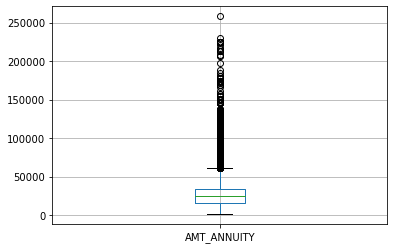

24903.0

In [11]:
# AMT_ANNUITY
print(inp1.AMT_ANNUITY.head()) # correct datatype
print(inp1.AMT_ANNUITY.describe())
inp1.boxplot(column=['AMT_ANNUITY'])
plt.show()
# from box plot it seems, it has lot of outliers so considering median measure
inp1.AMT_ANNUITY.median()
# we can impute 24903(median) value in place of missing values

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


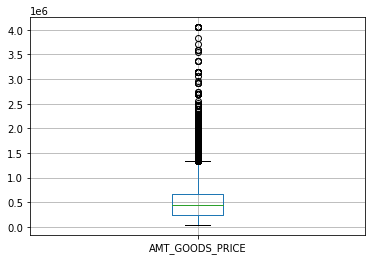

450000.0

In [12]:
# AMT_GOODS_PRICE
print(inp1.AMT_GOODS_PRICE.head()) # correct datatype
print(inp1.AMT_GOODS_PRICE.describe())
inp1.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()
# from box plot it seems, it has lot of outliers so considering median measure
inp1.AMT_GOODS_PRICE.median()
# we can impute 450000.0 value in place of missing values

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object
0    Unaccompanied
dtype: object
0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


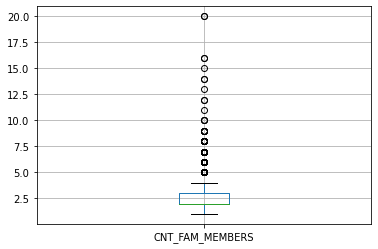

2.0

In [13]:
# NAME_TYPE_SUITE
print(inp1.NAME_TYPE_SUITE.head()) # correct datatype
print(inp1.NAME_TYPE_SUITE.describe())
# since it is a categorical value, considering mode measure to impute missing values
print(inp1.NAME_TYPE_SUITE.mode())#CNT_FAM_MEMBERS
print(inp1.CNT_FAM_MEMBERS.head()) # correct datatype
print(inp1.CNT_FAM_MEMBERS.describe())
inp1.boxplot(column=['CNT_FAM_MEMBERS'])
plt.show()
# from box plot it seems, it has many outliers so considering median measure
inp1.CNT_FAM_MEMBERS.median()
# we can impute "2.0" value in place of missing values

# considering the value to be imputed is - Unaccompanied

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


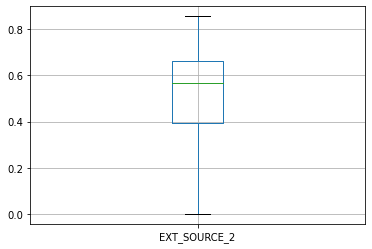

0.5659614260608526

In [14]:
#EXT_SOURCE_2
print(inp1.EXT_SOURCE_2.head()) # correct datatype
print(inp1.EXT_SOURCE_2.describe())
inp1.boxplot(column=['EXT_SOURCE_2'])
plt.show()
# from box plot it seems, mean and median are almost near and no outliers but there is some tilt towards outliers so go with median
inp1.EXT_SOURCE_2.median()
# so, we can impute 0.5659614260608526 value in place of missing values

In [15]:
# Checking the datatypes of all the columns and change the data type like negative age and date
print(inp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
inp1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
# finding count of unique values in each column
print(inp1.nunique().sort_values())

**Handling Negative Values


In [ ]:
# converting negative DAYS_BIRTH value to positive value
inp1['DAYS_BIRTH']=inp1['DAYS_BIRTH'].abs()
# converting negative DAYS_EMPLOYED value to positive value
inp1['DAYS_EMPLOYED']=inp1['DAYS_EMPLOYED'].abs()
# converting negative DAYS_REGISTRATION value to positive value
inp1['DAYS_REGISTRATION']=inp1['DAYS_REGISTRATION'].abs()
# converting negative DAYS_ID_PUBLISH value to positive value
inp1['DAYS_ID_PUBLISH']=inp1['DAYS_ID_PUBLISH'].abs()
# converting negative DAYS_LAST_PHONE_CHANGE value to positive value
inp1['DAYS_LAST_PHONE_CHANGE']=inp1['DAYS_LAST_PHONE_CHANGE'].abs()
inp1.head()

In [ ]:
# conversion of columns integer to categorical
for col in inp1.columns:
    if inp1[col].nunique() <= 3: # here considering columns with 3 unique values as categorical variables
        inp1[col] = inp1[col].astype(object)

inp1.info() 
inp1.head()

In [ ]:
plt.boxplot(inp1['CNT_CHILDREN'])
plt.show()
# From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers. 
Q1 = inp1['CNT_CHILDREN'].quantile(0.25)
Q3 = inp1['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
# According to Statictics the values above the upper whisker and below the lower whisker are considered as outliers
#and as we can see in plot outliers are present only above the upper wisker so considering them as outliers
print("The values greater than '2.5' are considered to be outliers,since count of children cannot be in decimals we can conclude that count greater than 3 can be an outlier".format(upperwhisker))


In [ ]:
plt.boxplot(inp1['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()
# From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers. 
Q1 = inp1['AMT_CREDIT'].quantile(0.25)
Q3 = inp1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
# the values above the upper whisker and below the lower whisker are considered as outliers
#and as we can see in plot outliers are present only above the upper wisker so considering them as outliers
#print("Lowerwhisker:{}".format(lowerwhisker))
'''as per statistics the the values less than lower whisker value -537975.0 considered as outlier, 
   as credit amount cannot be in negative we consider amount greater than  1616625.0 as an outlier.'''
print("Amount credited greater than '1616625.0' can be considered as an outlier".format(upperwhisker))


In [ ]:
print(inp1['AMT_CREDIT'].describe())
print(inp1['AMT_CREDIT'].max())

In [ ]:
data=inp1['AMT_ANNUITY']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()
# From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers. 
Q1 = inp1['AMT_ANNUITY'].quantile(0.25)
Q3 = inp1['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
# the values above the upper whisker and below the lower whisker are considered as outliers
#and as we can see in plot outliers are present only above the upper wisker so considering them as outliers
'''As per statistics the the values less than lower whisker value -10584.0 considered as outlier, 
   as amount cannot be negative we consider count greater than  61704.0 as an outlier.'''
print("Population relative count greater than  '61704.0' is considered to be an outlier".format(upperwhisker))


In [ ]:
plt.boxplot(inp1['REGION_POPULATION_RELATIVE'])
plt.show()
# From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers. 
Q1 = inp1['REGION_POPULATION_RELATIVE'].quantile(0.25)
Q3 = inp1['REGION_POPULATION_RELATIVE'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
# the values above the upper whisker and below the lower whisker are considered as outliers
#and as we can see in plot outliers are present only above the upper wisker so considering them as outliers
'''As per statistics the the values less than lower whisker value -0.017979500000000002 considered as outlier, 
   as people relative cannot be negative we consider count greater than  0.056648500000000004 as an outlier.'''
print("Population relative count greater than '0.056648500000000004' is considered to be an outlier".format(upperwhisker))


In [ ]:
data=inp1['AMT_GOODS_PRICE']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()
# From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers. 
Q1 = inp1['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = inp1['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)
# the values above the upper whisker and below the lower whisker are considered as outliers
#and as we can see in plot outliers are present only above the upper wisker so considering them as outliers
'''according to statistics the the values less than lower whisker value -423000.0 considered as outlier, 
   as amount cannot be negative we consider count greater than  1341000.0 as an outlier.'''
print("Population relative count greater than '1341000.0' is considered to be an outlier".format(upperwhisker))

In [ ]:
inp1.head(20)

In [ ]:
# Binning of continuous variables.Check if you need to bin any variable in different categories.Do this for atleast 2 variables
# AMT_INCOME_TOTAL
q1=inp1['AMT_INCOME_TOTAL'].quantile(0.25)
q2=inp1['AMT_INCOME_TOTAL'].quantile(0.50)
q3=inp1['AMT_INCOME_TOTAL'].quantile(0.75)
m=inp1['AMT_INCOME_TOTAL'].max()

# Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values
inp1['AMT_INCOME_TOTAL_Category'] = pd.cut(inp1['AMT_INCOME_TOTAL'],[q1, q2, q3,m ], labels = ['Low', 'High', 'Medium'])
print(inp1.AMT_INCOME_TOTAL_Category.value_counts())

In [ ]:
# AMT_CREDIT
q1=inp1['AMT_CREDIT'].quantile(0.25)
q2=inp1['AMT_CREDIT'].quantile(0.50)
q3=inp1['AMT_CREDIT'].quantile(0.75)
m=inp1['AMT_CREDIT'].max()

# Binning AMT_CREDIT into AMT_CREDIT_bin so we don't loose data and have binned values
inp1['AMT_CREDIT_bin'] = pd.cut(inp1['AMT_CREDIT'],[q1, q2, q3,m ], labels = ['Low', 'High', 'Medium'])
print(inp1.AMT_CREDIT_bin.value_counts())

In [ ]:
inp1.head()

**Analysis**

In [ ]:

#Checking the imbalance percentage.
print(100*inp1.TARGET.value_counts()/ len(inp1))
(inp1.TARGET.value_counts()/ len(inp1)).plot.bar()
plt.xticks(rotation=0)
plt.show()
# In application_data there exists 91.927118% of "not default" and 8.072882% of "default" customers.

In [ ]:
# Divide the data into two sets, i.e., Target-1 and Target-0
inp1_1 = inp1[inp1['TARGET']==1]
inp1_0 = inp1[inp1['TARGET']==0]

In [ ]:
#Perfeorming analysis for one column at a time
# perform univariate analysis for categoriacal variables for both 0 and 1
# WEEKDAY_APPR_PROCESS_START (categorical ordered variable)
# for TARGET=0
inp1_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()
# from the graph we can conclude that application starting processes will be less in saturday and sunday.
# for TARGET=1
inp1_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()
# from the graph we can conclude that application starting processes are generally less in saturday and sunday.

In [ ]:
 #NAME_EDUCATION_TYPE (categorical ordered variable)
# for Target=0
plt.figure(figsize=[8,6])
inp1_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for non-default')
plt.show()
# from the plot below, we can conclude that secondary/special educated people are applying loans in high in number.
# for Target=1
plt.figure(figsize=[8,6])
inp1_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('for default')
plt.show()
# from the plot below, we can conclude that secondary/special educated people are applying loans high in number.
#and Academic degree educated people are applying loan in least count.
# for both target= 0 and 1

In [ ]:
# NAME_FAMILY_STATUS 
# for TARGET=0
inp1_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()
# for TARGET=1
inp1_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()
# the order of both default and not default customers is same i.e., Married,Single/not married,civil marriage,seperated,widow
# It also shows that there exists few(1 or 2) unknown values in not default client family status.

# We can say more married people tend to take more Loan as compaired to other categories
# and being married is not impacting default and not defaulting


In [ ]:
# NAME_INCOME_TYPE
# for TARGET=0
inp1_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()
# for TARGET=1
inp1_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()
# from the graphs below, we can conclude that
# Pensioner of not default case are high in number compared to Pensioner of default case.
#It seems there exists both loss and profit due to Pension people to the Bank.
# It also shows that majority of defaulters income type is working.
#and at the same time there is good income to bank from working people.

In [ ]:
# NAME_HOUSING_TYPE
# for TARGET=0
inp1_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for non-default')
plt.show()
# for TARGET=1
inp1_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('for default')
plt.show()
# from graph we can conclude that there exists people who have own house
# lies in both default and non default.

In [ ]:
#considering 10 categorical columns
categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_bin','AMT_INCOME_TOTAL_Category']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=inp1)
    plt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()
#the XNA in Code_gender is not known if it is NA or a category so leaving it as it is.

In [ ]:
#considering 10 continous numerical columns
continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(inp1_1[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(inp1_0[i[1]].dropna(),hist=False,label='Target : no default')
plt.show()    

In [ ]:
#application_data_1.corr()
inp1_1.corr().unstack().reset_index().sort_values(by=0,ascending=False)
#there are many repeted values

In [ ]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = inp1_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

In [ ]:
pair = inp1_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

In [ ]:
#finding Top 10 Correlated values for defalut(1)
# finding correlation so that  there are no repeated values
corr=inp1_1.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)


In [ ]:
#finding Top 10 Correlated values for non-defalut(0)
corr=inp1_0.corr()
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=round(corrdf['Coorelation'],2)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

In [ ]:
#Correlated values for non-defalut(0)

fig = plt.figure(figsize=(15,12))
heatplot=sns.heatmap(inp1_0.corr(), cmap='Greens',annot=False,linewidth =1)

**Inferences:*
Correlating factors amongst repayers:
Credit amount is highly correlated with
amount of goods price
1)loan annuity
2)total income
We can also see that repayers have high correlation in number of days employed.

In [ ]:
# Correlated values for defalut(1)
fig = plt.figure(figsize=(15,12))
heatplot= sns.heatmap(inp1_1.corr(), cmap="Greens",annot=False,linewidth =1)

** Inferences: **
**Credit amount is highly correlated with amount of goods price which is same as repayers.**
**But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77).**
**We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).**
**There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.**
**Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.**
**There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)**


In [ ]:
#Bi-variate categorical plots

table_1= pd.crosstab(index=inp1['TARGET'],columns=inp1['NAME_CONTRACT_TYPE'])
print(table_1)
table_1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()
# High number of cash loans

In [ ]:
table_2= pd.crosstab(index=inp1['TARGET'],columns=inp1['CODE_GENDER'])
print(table_2)
table_2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()
#Females take more loans

In [ ]:
table_3= pd.crosstab(index=inp1['TARGET'],columns=inp1['NAME_TYPE_SUITE'])
print(table_3)
table_3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()
# Most of the people come alone when taking a loan

In [ ]:
table_4= pd.crosstab(index=inp1['TARGET'],columns=inp1['NAME_INCOME_TYPE'])
print(table_3)
print(table_4)
table_4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# working people take more loans

In [ ]:
table_5= pd.crosstab(index=inp1['TARGET'],columns=inp1['NAME_HOUSING_TYPE'])
print(table_5)
table_5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# People having house/appartment tend to take more loans

In [ ]:
table_6= pd.crosstab(index=inp1['TARGET'],columns=inp1['NAME_EDUCATION_TYPE'])
print(table_6)
table_6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()
##Secondary/secondary special education people apply for more loans

In [ ]:
table_7= pd.crosstab(index=inp1['TARGET'],columns=inp1['OCCUPATION_TYPE'])
print(table_7)
table_7.plot(kind="bar", figsize=(8,8),stacked=False)
plt.xticks(rotation=0)
plt.show()
##Occupation wise laborers applied for loans more then any other occupation

Second Data Analysis

In [ ]:
inp2=pd.read_csv("previous_application.csv")
inp2.head()

In [ ]:
# data check with respect to size,data type etc,.
print(inp2.shape)
print(inp2.info())
print(inp2.describe())

In [ ]:
# checking of missing values percentage
round((100*inp2.isnull().sum()/len(inp2)),2)


In [ ]:
# removing those columns which are having null percentage greater than 50
# AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED 
inp2=inp2.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)
inp2.info()

In [ ]:
# converting -ve values to +ve
inp2['DAYS_DECISION']=inp2['DAYS_DECISION'].abs()
inp2['SELLERPLACE_AREA']=inp2['SELLERPLACE_AREA'].abs()
inp2['DAYS_FIRST_DUE']=inp2['DAYS_FIRST_DUE'].abs()
inp2['DAYS_LAST_DUE_1ST_VERSION']=inp2['DAYS_LAST_DUE_1ST_VERSION'].abs()
inp2['DAYS_LAST_DUE']=inp2['DAYS_LAST_DUE'].abs()
inp2['DAYS_TERMINATION']=inp2['DAYS_TERMINATION'].abs()
inp2['DAYS_FIRST_DRAWING']=inp2['DAYS_FIRST_DRAWING'].abs()

In [ ]:
(inp2.NAME_CONTRACT_STATUS.value_counts()/len(inp2)).plot.bar()
plt.show()

In [ ]:
# making a left join because we need all the rows in application data 
# by making this left join we get historical application data for each applicant.
# if we made a inner join we would loose the data of a new customer who doesn't have a previous record.
# Current data will get duplicated the exact number of times it is found in previous application data.
# with this in mind we are moving forward.

merged_df=pd.merge(inp1,inp2,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_df.head()

In [ ]:
merged_df.shape

In [ ]:
# Univariate Categorical analysis
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                     'WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
                    'AMT_INCOME_TOTAL_Category','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    #lt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

In [ ]:
# Univariate Numerical analysis
continous_columns=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')

plt.show() 

In [ ]:
table_8= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Current'])
print(table_8)
table_8.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
#Cash loans have the highest count of Approved loans

In [ ]:
table_9= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_INCOME_TYPE'])
print(table_9)
table_9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for working applicant

In [ ]:
table_10= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_EDUCATION_TYPE'])
print(table_10)
table_10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Secondary/secondary special educated applicant

In [ ]:
table_11= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_FAMILY_STATUS'])
print(table_11)
table_11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Married applicant

In [ ]:
table_12= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_HOUSING_TYPE'])
print(table_12)
table_12.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for House/apartment owner.

In [ ]:
table_13= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Previous'])
print(table_13)
table_13.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Consumer Loans.

In [ ]:
#Bi-variate continous plots
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
                   
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
plt.show() 

**Insights*
AMT_CREDIT_Previous has highest refused cases and AMT_CREDIT_Current is similar for all 4 cases.
time spent in unused offer is higher as compared to other categories.
So bank should reduce time spent on unused offer.
nuclear family(2-3 people in family) get highest approval.
Previously most of the applications were cancelled or refused
but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_GOODS_PRICE.
Previously most of the applications were cancelled or refused
but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_ANNUITY.